In [1]:
import pystan
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(14, 10)})

In [3]:
df = pd.read_csv('data/hierarchical_betaBlocker.csv', index_col=0)

In [4]:
df

,rt,nt,rc,nc,N
1,3,38,3,39,22
2,7,114,14,116,22
3,5,69,11,93,22
4,102,1533,127,1520,22
5,28,355,27,365,22
6,4,59,6,52,22
7,98,945,152,939,22
8,60,632,48,471,22
9,25,278,37,282,22
10,138,1916,188,1921,22


In [5]:
data = {'N': df.shape[0], 'rt': df.rt.values, 'nt': df.nt.values, 'rc': df.rc.values, 'nc': df.nc.values}

## 17.1.1

In [6]:
ocode = '''
data {
    int<lower=0> N;
    int<lower=0> rt[N];
    int<lower=0> nt[N];
    int<lower=0> rc[N];
    int<lower=0> nc[N];
}

parameters {
    vector[N] mu;
    vector[N] diff;
}

model {
    mu ~ normal(0, 10);
    diff ~ normal(0, 10);
    
    rc ~ binomial_logit(nc, mu);
    rt ~ binomial_logit(nt, mu+diff);
}
'''
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1f2993d3db8da371e2b480efb237d383 NOW.


In [7]:
fit = sm.sampling(data=data, iter=5000, chains=4, seed=1)
fit

Inference for Stan model: anon_model_1f2993d3db8da371e2b480efb237d383.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]     -2.64  6.0e-3   0.64  -4.02  -3.03  -2.58   -2.2  -1.55  11232    1.0
mu[2]     -2.01  2.5e-3   0.29  -2.61   -2.2   -2.0  -1.81  -1.47  14014    1.0
mu[3]     -2.04  2.6e-3   0.33  -2.72  -2.26  -2.03  -1.82  -1.44  15281    1.0
mu[4]      -2.4  7.7e-4   0.09  -2.58  -2.46   -2.4  -2.34  -2.22  14749    1.0
mu[5]     -2.54  1.8e-3    0.2  -2.96  -2.68  -2.54   -2.4  -2.16  12139    1.0
mu[6]     -2.12  4.0e-3   0.45  -3.09   -2.4  -2.09   -1.8   -1.3  12583    1.0
mu[7]     -1.65  7.6e-4   0.09  -1.82  -1.71  -1.65  -1.59  -1.48  13688    1.0
mu[8]     -2.19  1.4e-3   0.15   -2.5  -2.29  -2.18  -2.08  -1.89  12835    1.0
mu[9]      -1.9  1.6e-3   0.18  -2.26  -2.02   -1.9  -1.78  -1.57  12078    1.0
mu[10]    

<AxesSubplot:>

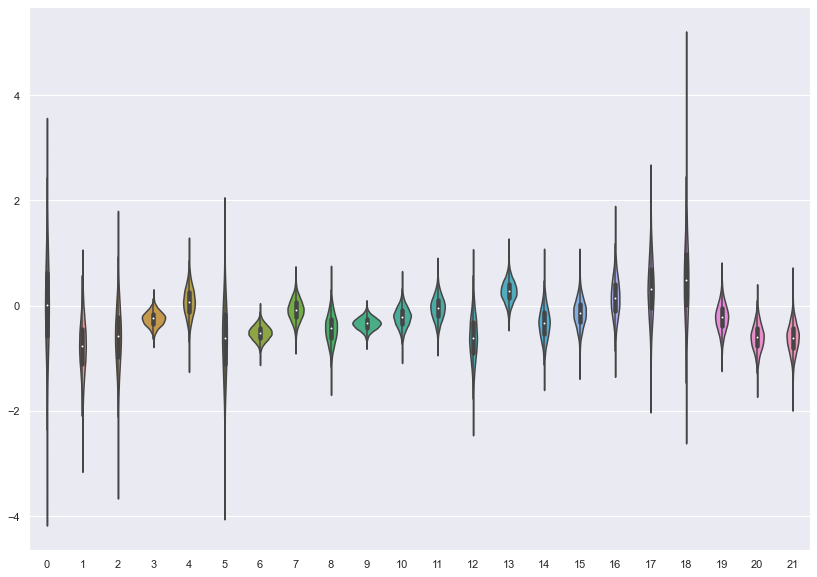

In [8]:
sns.violinplot(data=list(fit.extract('diff')['diff'].T))

# 17.1.2

In [9]:
ocode = '''
data {
    int<lower=0> N;
    int<lower=0> rt[N];
    int<lower=0> nt[N];
    int<lower=0> rc[N];
    int<lower=0> nc[N];
}

parameters {
    vector[N] mu;
    vector[N] diff;
    
    real d;
    real<lower=0> sigma;
}

model {
    d ~ normal(0, 10);
    sigma ~ cauchy(0, 2.5);


    mu ~ normal(0, 10);
    diff ~ normal(d, sigma);
    
    rc ~ binomial_logit(nc, mu);
    rt ~ binomial_logit(nt, mu+diff);
}
'''
sm2 = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_179f24a0324c88ae42b1449220676f3e NOW.


In [10]:
fit2 = sm2.sampling(data=data, iter=5000, chains=4, seed=1, control=dict(adapt_delta=0.99))
fit2

Inference for Stan model: anon_model_179f24a0324c88ae42b1449220676f3e.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]     -2.43  4.6e-3   0.46   -3.4  -2.72   -2.4  -2.11  -1.61   9801    1.0
mu[2]     -2.19  2.3e-3   0.24  -2.68  -2.35  -2.18  -2.02  -1.73  11465    1.0
mu[3]     -2.13  2.7e-3   0.28   -2.7  -2.31  -2.12  -1.94  -1.62  10492    1.0
mu[4]      -2.4  9.2e-4   0.08  -2.56  -2.45  -2.39  -2.34  -2.24   7913    1.0
mu[5]     -2.41  2.1e-3   0.16  -2.73  -2.52  -2.41  -2.31  -2.12   5837    1.0
mu[6]     -2.23  3.4e-3   0.35  -2.93  -2.45  -2.22  -1.99  -1.59  10310    1.0
mu[7]     -1.71  1.5e-3   0.08  -1.87  -1.76  -1.71  -1.65  -1.54   3019    1.0
mu[8]     -2.12  1.6e-3   0.12  -2.36   -2.2  -2.11  -2.03  -1.88   5790    1.0
mu[9]     -1.96  1.6e-3   0.15  -2.26  -2.06  -1.96  -1.86  -1.67   9141    1.0
mu[10]    

<AxesSubplot:>

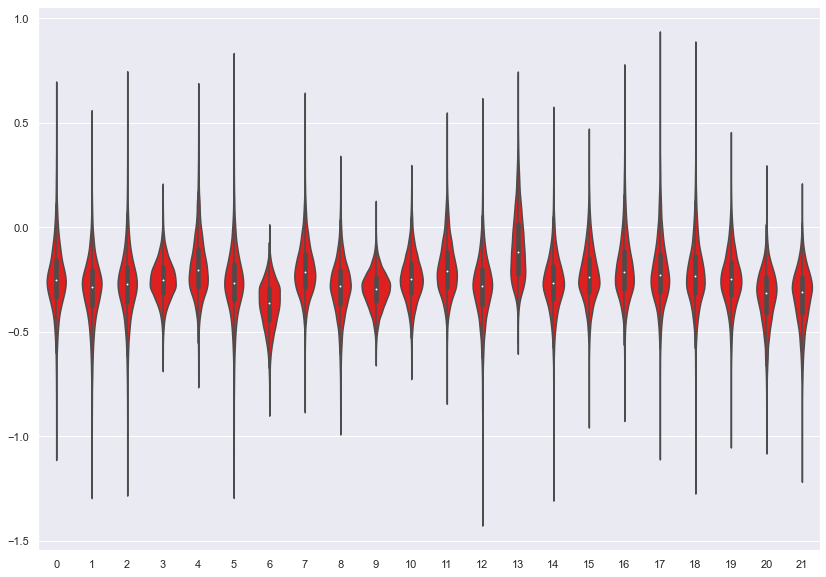

In [11]:
sns.violinplot(data=list(fit2.extract('diff')['diff'].T), color='red')

In [12]:
dd = pd.DataFrame(fit.extract('diff')['diff']).melt()
dd['model'] = 'heterogenous'
dd2 = pd.DataFrame(fit2.extract('diff')['diff']).melt()
dd2['model'] = 'hierarchical non-centered'

df = pd.concat([dd, dd2], axis=0)

<AxesSubplot:xlabel='variable', ylabel='value'>

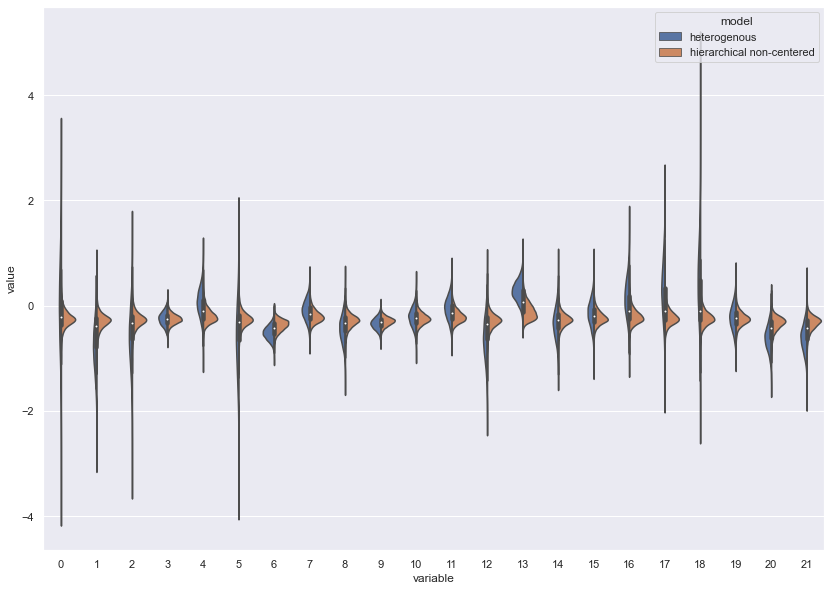

In [13]:
sns.violinplot(data=df, x='variable', y='value', hue='model', split=True)

## 17.1.3

In [14]:
ocode = '''
data {
    int<lower=0> N;
    int<lower=0> rt[N];
    int<lower=0> nt[N];
    int<lower=0> rc[N];
    int<lower=0> nc[N];
}

parameters {
    vector[N] mu;
    vector[N] diff;
    
    real d;
    real<lower=0> sigma;
}

model {
    d ~ normal(0, 10);
    sigma ~ cauchy(0, 2.5);


    mu ~ normal(0, 10);
    diff ~ normal(d, sigma);
    
    rc ~ binomial_logit(nc, mu);
    rt ~ binomial_logit(nt, mu+diff);
}

generated quantities {
    real gen_diff; 
    gen_diff = normal_rng(d, sigma);
}
'''
sm3 = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a6c945882ecae43afbff89c3298d17fe NOW.


In [15]:
fit3 = sm3.sampling(data=data, iter=5000, chains=4, seed=1, control=dict(adapt_delta=0.99))
fit3

Inference for Stan model: anon_model_a6c945882ecae43afbff89c3298d17fe.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]     -2.44  4.4e-3   0.45  -3.38  -2.71  -2.41  -2.13  -1.62  10342    1.0
mu[2]     -2.19  4.7e-3   0.25  -2.73  -2.35  -2.18  -2.03  -1.73   2901    1.0
mu[3]     -2.13  2.9e-3   0.27  -2.68   -2.3  -2.12  -1.94  -1.62   8672    1.0
mu[4]     -2.39  1.5e-3   0.08  -2.56  -2.45  -2.39  -2.34  -2.24   3097    1.0
mu[5]     -2.41  2.2e-3   0.15  -2.73  -2.51  -2.41  -2.31  -2.12   5047    1.0
mu[6]     -2.23  6.5e-3   0.35  -2.94  -2.46  -2.22  -1.99  -1.59   2881    1.0
mu[7]     -1.71  1.4e-3   0.08  -1.87  -1.76  -1.71  -1.65  -1.54   3353    1.0
mu[8]     -2.12  1.8e-3   0.12  -2.37  -2.19  -2.11  -2.03  -1.88   4584    1.0
mu[9]     -1.96  1.6e-3   0.15  -2.25  -2.06  -1.96  -1.86  -1.68   8058    1.0
mu[10]    

C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

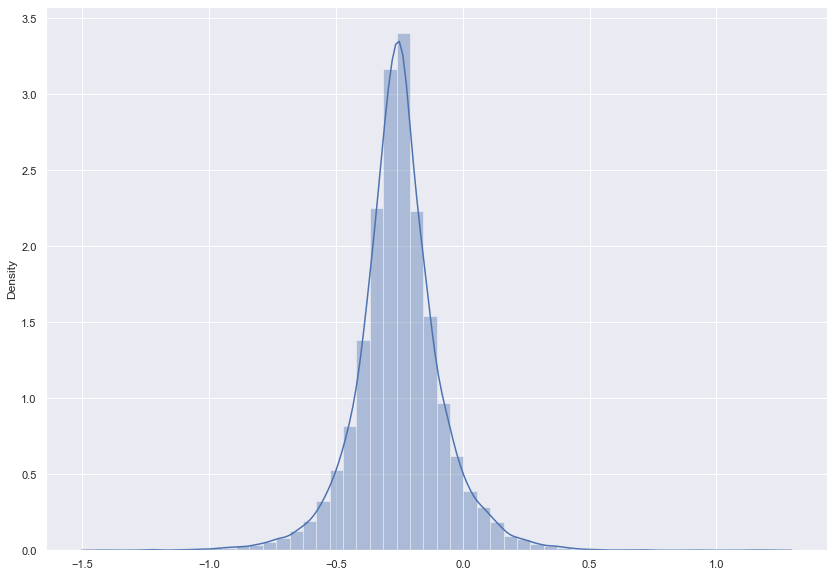

In [16]:
sns.distplot(fit3.extract('gen_diff')['gen_diff'])

## 17.1.4

TODO

## 17.1.5

In [17]:
ocode = '''
data {
    int<lower=0> N;
    int<lower=0> rt[N];
    int<lower=0> nt[N];
    int<lower=0> rc[N];
    int<lower=0> nc[N];
}

parameters {
    real mu;
    real diff;
}

model {
    mu ~ normal(0, 10);
    diff ~ normal(0, 10);
    
    rc ~ binomial_logit(nc, mu);
    rt ~ binomial_logit(nt, mu+diff);
}

'''
sm4 = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1d46978fe7de8a582a14d589d888e51b NOW.


In [18]:
fit4 = sm4.sampling(data=data, iter=5000, chains=4, seed=1, control=dict(adapt_delta=0.99))
fit4

Inference for Stan model: anon_model_1d46978fe7de8a582a14d589d888e51b.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     -2.2  5.9e-4   0.03  -2.27  -2.22   -2.2  -2.18  -2.13   3258    1.0
diff  -0.26  8.6e-4   0.05  -0.35  -0.29  -0.26  -0.22  -0.16   3296    1.0
lp__  -6090    0.02    1.0  -6093  -6091  -6090  -6090  -6089   2849    1.0

Samples were drawn using NUTS at Sat Mar 20 23:29:37 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

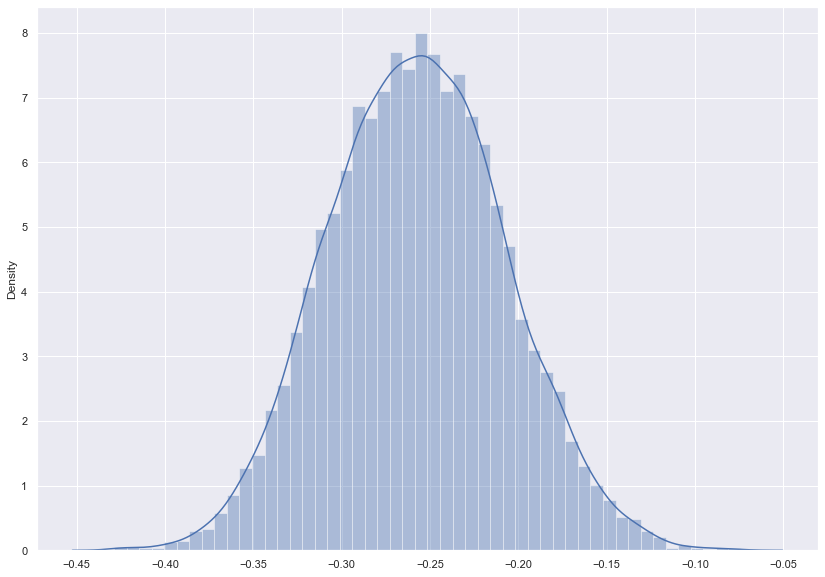

In [19]:
sns.distplot(fit4.extract('diff')['diff'])

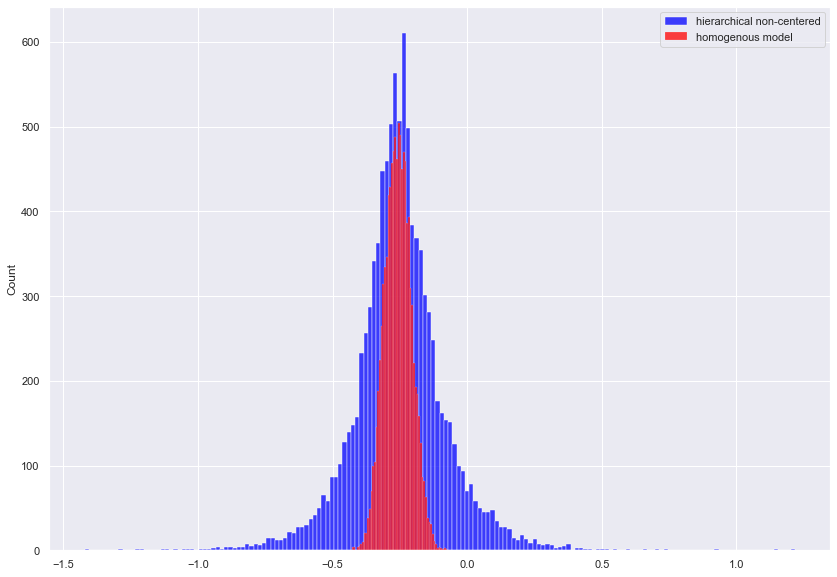

In [20]:
fig, ax = plt.subplots()
sns.histplot(fit3.extract('gen_diff')['gen_diff'], ax=ax, label='hierarchical non-centered', color='blue')
sns.histplot(fit4.extract('diff')['diff'], ax=ax, label='homogenous model', color='red')

ax.legend()

## 17.1.6

TODO